# MI2 - 10: Self Organizing Maps
## The chantastic 4: Elisabeth Kress, Paola Suárez, Jianmeng Wu and Esra Zihni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

## 10.1.  1d Self-Organizing Map for 2d data

### a) Generating data points

In [2]:
d = 2
p = 1000
low = [0,0]
high = [2,1]
x = np.random.uniform(low, high, size=(p,d))

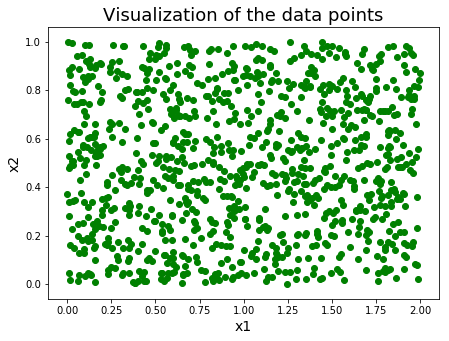

In [3]:
plt.figure(figsize= (7,5))
plt.scatter(x[:,0],x[:,1],c= 'g')
plt.title('Visualization of the data points', size=18)
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.show()

### b) Gaussian neighbourhood function

In [4]:
def h_function(q, p, sigma):
    #return np.exp(-((q-p)**2)/(2*(sigma**2)))
    return np.exp( - np.linalg.norm( q - p ) ** 2 / 2 / sigma ** 2 )

def init_w1(x, K):
    w = np.random.normal(loc=x.mean(axis=0), size=(K,x.shape[1]))
    return w

def init_w2(x, K):
    w = np.zeros((K, x.shape[1]))
    w[:,-1] = np.random.uniform(0, 5, K)
    return w

### c) Implementing 1d self organizing map

In [5]:
def SOM(x, Ks, init_w, epsilon0=0.1, sigma0=1.5):
    dim = x.shape[1]
    t_max = len(x)
    final_ws =[]
    epsilons = np.zeros((t_max+1, len(Ks)))
    sigmas = np.copy(epsilons)
    epsilons[0,:] = epsilon0
    sigmas[0,:] = sigma0*Ks.mean()/np.log(Ks)

    for l,K in enumerate(Ks):
        w = init_w(x, K)

        for t in range(t_max):
            if t <= t_max/4: 
                epsilons[t,l] = epsilons[0,l]
                sigmas[t,l] = sigmas[0,l]
            else: 
                epsilons[t,l] = epsilons[t-1,l] * 0.99
                sigmas[t,l] = sigmas[t-1,l] * 0.99
            p= np.argmin(euclidean_distances(x[t].reshape(1,dim), w))
            for j in range(K):
                w[j,:] += epsilons[t,l]*np.dot(h_function(p, j, sigmas[t,l]),(x[t]-w[j,:])) 
        final_ws.append(w)
        
    return final_ws, epsilons, sigmas

In [6]:
Ks = np.array([4,8,16,32,64,128])
final_ws, epsilons, sigmas = SOM(x, Ks, init_w1)

### d) Plotting

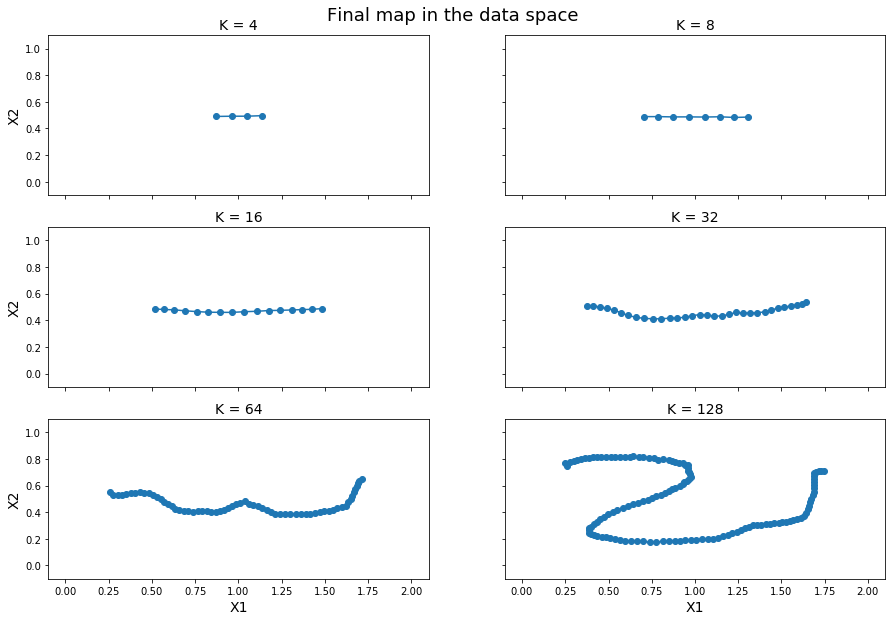

In [7]:
# Plot the protoypes and their connections
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize= (15,10))
ax = ax.ravel()
for i,K in enumerate(Ks):
    #ax[i].scatter(x[:,0],x[:,1],c= 'g',alpha=0.3)
    ax[i].plot(final_ws[i][:,0],final_ws[i][:,1], 'o-')
    ax[i].set_title('K = %i'%(K), size=14)
    ax[i].set_xlim(-0.1,2.1)
    ax[i].set_ylim(-0.1,1.1)
    if i%2 == 0:
        ax[i].set_ylabel("X2", size=14)
ax[4].set_xlabel("X1", size=14)
ax[5].set_xlabel("X1", size=14)
plt.suptitle('Final map in the data space', size=18, y=0.92)
plt.show()

## 10.2.  1d Self-Organizing Maps for 3d data

### a) Visualization of dataset

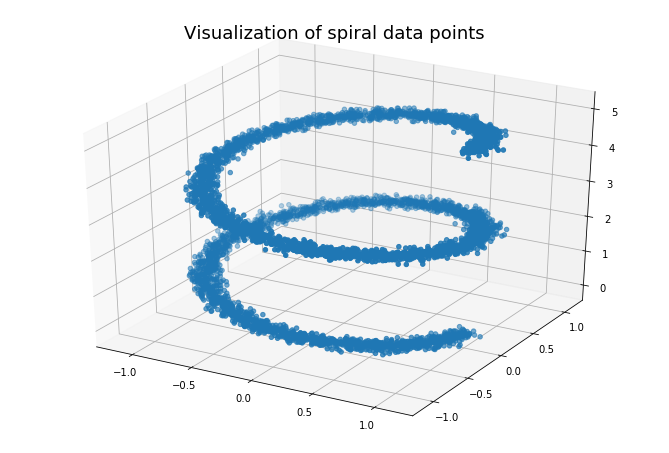

In [8]:
x2 = np.genfromtxt('spiral.csv', delimiter=',',skip_header=1,usecols=(1,2,3))

fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(x2[:,0],x2[:,1], x2[:,2], depthshade=True)
plt.title('Visualization of spiral data points', size=18)
plt.show()

In [9]:
# Permutate values
x2_p = np.random.permutation(x2)

### b) Adapted SOM function

Our function is general enough, thanks to Meng not to Esra.

### c) Implementing 1d self organizing map

In [10]:
Ks = np.array([16,32,64,128])
final_ws, epsilons, sigmas = SOM(x2_p, Ks, init_w2)

###  d) Plotting

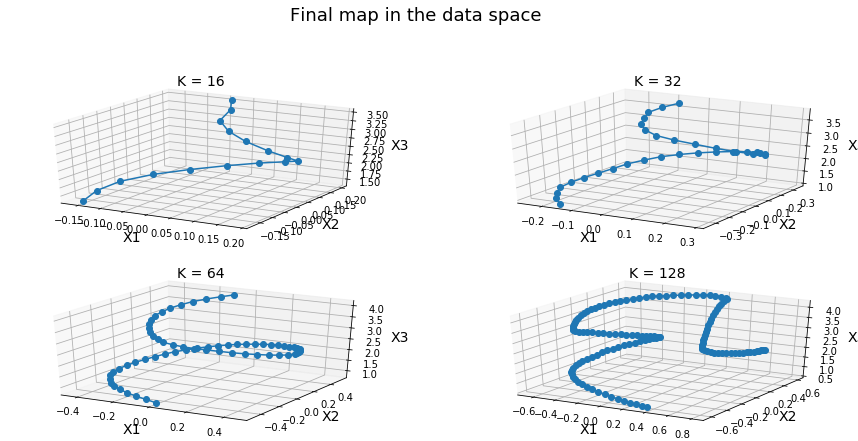

In [11]:
fig = plt.figure(figsize=(15,10))

for i,K in enumerate(Ks):
    ax = fig.add_subplot(3,2,i+1, projection='3d')
    #ax.scatter(x2[:,0],x2[:,1], x2[:,2], depthshade=True)
    ax.plot(final_ws[i][:,0],final_ws[i][:,1],final_ws[i][:,2], 'o-')
    ax.set_title('K = %i'%(K), size=14)
    ax.set_xlabel("X1", size=14)
    ax.set_ylabel("X2", size=14)
    ax.set_zlabel("X3", size=14)
    
plt.suptitle('Final map in the data space', size=18)
plt.show()

## 10.3.  2d Self-Organizing Maps for 3d data

### a) Visualization of dataset

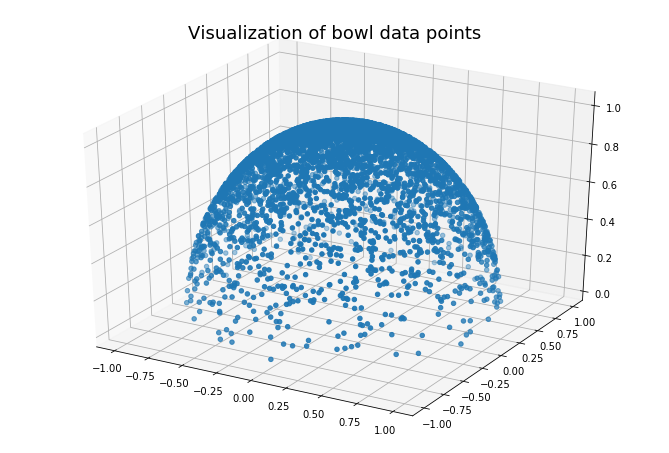

In [12]:
x3 = np.genfromtxt('bowl.csv', delimiter=',',skip_header=1,usecols=(1,2,3))

fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(x3[:,0],x3[:,1], x3[:,2], depthshade=True)
plt.title('Visualization of bowl data points', size=18)
plt.show()

### b) Adapted SOM function

In [13]:
def init_w3(x, K):
    cov = np.cov(x.T)
    val, vec = np.linalg.eigh(cov)
    mu = x.mean(axis=0)

    grid = np.dstack(np.meshgrid(np.arange(-K/2, K/2),np.arange(-K/2, K/2))).reshape(-1,2) * 0.25
    
    w = np.dot(grid, vec[:,-2:].T) + mu
    return w

def init_w4(x, K):
    w = np.zeros((K**2, x.shape[1]))
    for d in range(x.shape[1]):
        w[:,d] = np.random.uniform(x[:,d].min(), x[:,d].max(), K**2)
    return w

w = init_w4(x3, 8)

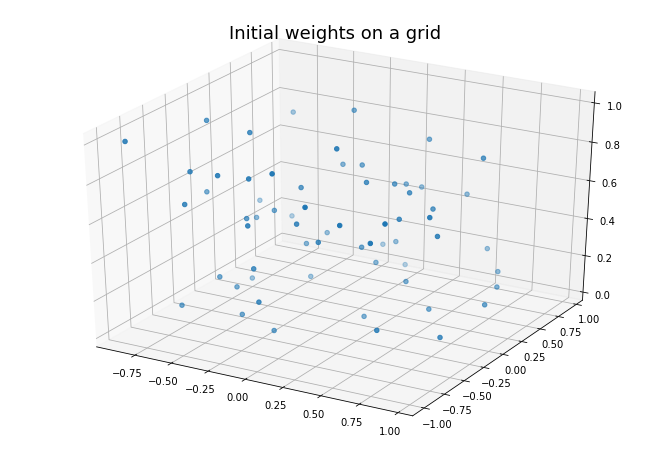

In [14]:
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(w[:,0], w[:,1], w[:,2], depthshade=True)
plt.title('Initial weights on a grid', size=18)
plt.show()

In [15]:
def SOM_2D(x, Ks, init_w, epsilon0=0.1, sigma0=1.5):
    dim = x.shape[1]
    t_max = len(x)
    final_ws =[]
    ws = []
    epsilons = np.zeros((t_max+1, len(Ks)))
    sigmas = np.copy(epsilons)
    epsilons[0,:] = epsilon0
    sigmas[0,:] = sigma0

    x = np.random.permutation(x)

    for l,K in enumerate(Ks):
        W = np.zeros((t_max+1, K*K, dim))
        W[0] = init_w(x, K)

        for t in range(t_max):
            if t <= t_max/4: 
                epsilons[t,l] = epsilons[0,l]
                sigmas[t,l] = sigmas[0,l]
            else: 
                epsilons[t,l] = epsilons[t-1,l] * 0.999
                sigmas[t,l] = sigmas[t-1,l] * 0.999
            
            w = W[t].copy()
            p = np.argmin(euclidean_distances(x[t].reshape(1,dim), w))
            for j in range(K):
                w[j,:] += epsilons[t,l]* h_function(p, j, sigmas[t,l]) * (x[t]-w[j,:])
            W[t+1] = w.copy() 
        final_ws.append(w)
        ws.append(W)
        
    return ws, epsilons, sigmas

In [21]:
Ks = np.array([8])
ws, epsilons, sigmas = SOM_2D(x2_p, Ks, init_w4, epsilon0=0.1, sigma0=5)
ws2, epsilons, sigmas = SOM_2D(x2_p, Ks, init_w3, epsilon0=0.9, sigma0=5)

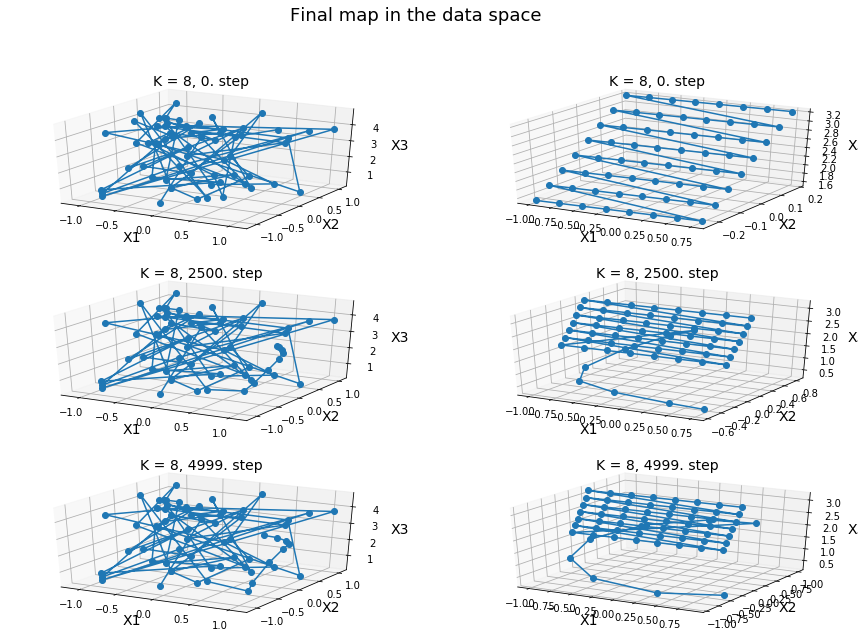

In [22]:
fig = plt.figure(figsize=(15,10))
Idx = [0, int(len(x3)/2), len(x3)-1]
for i,K in enumerate(Ks):
    for j, idx in enumerate(Idx):
        ax = fig.add_subplot(3,2,j*2+i+1, projection='3d')
        #ax.scatter(x2[:,0],x2[:,1], x2[:,2], depthshade=True)
        ax.plot(ws[i][idx,:,0],ws[i][idx,:,1],ws[i][idx,:,2], 'o-')
        ax.set_title('K = %i, %i. step'%(K, idx), size=14)
        ax.set_xlabel("X1", size=14)
        ax.set_ylabel("X2", size=14)
        ax.set_zlabel("X3", size=14)
        
        ax = fig.add_subplot(3,2,j*2+i+2, projection='3d')
        #ax.scatter(x2[:,0],x2[:,1], x2[:,2], depthshade=True)
        ax.plot(ws2[i][idx,:,0],ws2[i][idx,:,1],ws2[i][idx,:,2], 'o-')
        ax.set_title('K = %i, %i. step'%(K, idx), size=14)
        ax.set_xlabel("X1", size=14)
        ax.set_ylabel("X2", size=14)
        ax.set_zlabel("X3", size=14)
    
plt.suptitle('Final map in the data space', size=18)
plt.show()

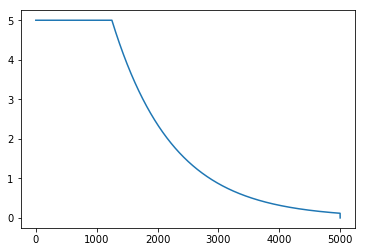

In [18]:
plt.plot(sigmas)